In [4]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

In [5]:
def muestra(img):
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.xticks([]),plt.yticks([]) #Ocultar ejes
    plt.show()

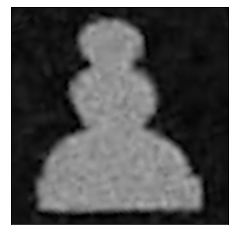

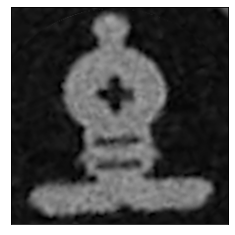

True

In [57]:
peon = cv2.cvtColor(cv2.imread("./imagenes/fichas/PeonBlanco1.png"), cv2.COLOR_BGR2GRAY)
peon = peon[120:360,140:380]
muestra(peon)
alfil = cv2.cvtColor(cv2.imread("./imagenes/fichas/AlfilBlanco.png"), cv2.COLOR_BGR2GRAY)
alfil = alfil[90:330,160:400]
muestra(alfil)
cv2.imwrite("./imagenes/fichas/6.png",peon )
cv2.imwrite("./imagenes/fichas/2.png", alfil )

In [247]:
img = cv2.cvtColor(cv2.imread("./imagenes/fichas/PeonBlanco1Rotado2.png"), cv2.COLOR_BGR2GRAY)


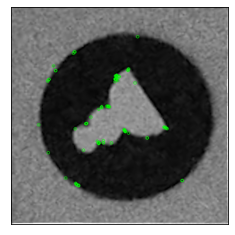

In [256]:
# Initiate ORB detector
orb = cv2.ORB_create(nfeatures=100,edgeThreshold=50)
# compute the descriptors with ORB
kp, des = orb.detectAndCompute(img, None)
# draw only keypoints location,not size and orientation
muestra(cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=0))

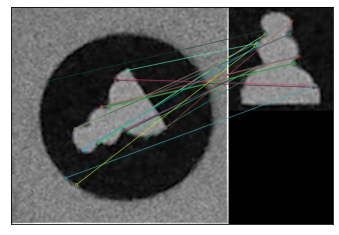

37.48148148148148

In [260]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des,desP)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv2.drawMatches(img,kp,peon,kpP,matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
muestra(img3)
distanciaMedia(matches)

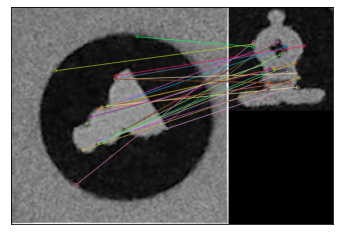

64.57142857142857

In [259]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des,desA)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img4 = cv2.drawMatches(img,kp,alfil,kpA,matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
muestra(img4)
distanciaMedia(matches)

In [196]:
fichas = []
for i in range(1,13):
    f = cv2.imread("./imagenes/fichas/clases/"+str(i)+".png")   
    fichas.append(f) 

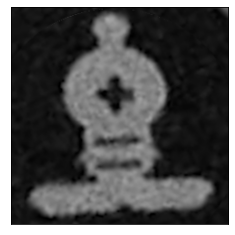

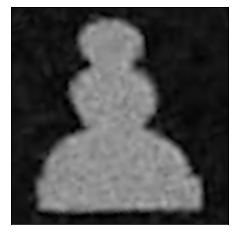

In [131]:
for f in fichas:
    muestra(f)

In [217]:
descriptores = []
# Initiate ORB detector
orb = cv2.ORB_create()

# compute the descriptors with ORB
for f in fichas:
    if type(f) is np.ndarray: # Solo para pruebas
        descriptores.append(orb.detectAndCompute(f, None)[1])
    else:
        descriptores.append(None)
        
del orb



In [257]:
def distanciaMedia(matches):
    return sum(map(lambda m: m.distance,matches)) / len(matches)

def clasifica(img):
    # Initiate ORB detector
    orb = cv2.ORB_create()
    # compute the descriptors with ORB
    kpO, desO = orb.detectAndCompute(img, None)
    # draw only keypoints location,not size and orientation
   
    best = 70
    best_clase = 0
    for i,des in enumerate(descriptores, start=1):
        if type(des) is np.ndarray : # Solo para pruebas
            # Match descriptors.
            matches = bf.match(desO,des)
            # Sort them in the order of their distance.
            #matches = sorted(matches, key = lambda x:x.distance)

            #if len(matches) > 20: # 50?
            media = distanciaMedia(matches)
            if media < best:
                best = media
                best_clase = i
    return best, best_clase

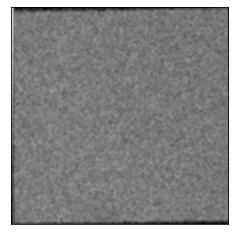

(70, 0)

In [238]:
img = cv2.cvtColor(cv2.imread("./imagenes/fichas/vacia.png"), cv2.COLOR_BGR2GRAY)
muestra(img)
clasifica(img)

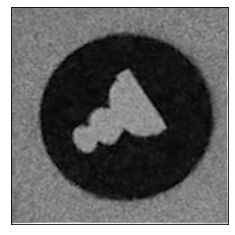

(37.48148148148148, 6)

In [258]:
img = cv2.cvtColor(cv2.imread("./imagenes/fichas/PeonBlanco1Rotado2.png"), cv2.COLOR_BGR2GRAY)
muestra(img)
clasifica(img)

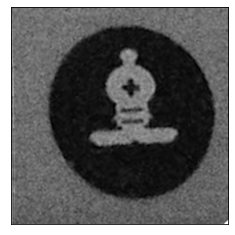

(17.614864864864863, 2)

In [240]:
img = cv2.cvtColor(cv2.imread("./imagenes/fichas/AlfilBlanco.png"), cv2.COLOR_BGR2GRAY)
muestra(img)
clasifica(img)

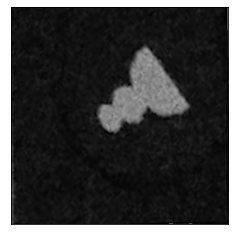

(55.13636363636363, 6)

In [242]:
img = cv2.cvtColor(cv2.imread("./imagenes/fichas/PeonBlanco2Rotado.png"), cv2.COLOR_BGR2GRAY)
muestra(img)
clasifica(img)